In [62]:
import pandas as pd
df = pd.read_excel('inputsV3.xlsx')
df.head()

,Body,Sentiment,Quality
0,The women's health portion isn't accurate. I a...,negative,Functional Suitability
1,All is good but it doesn't have Indian food ty...,negative,Functional Suitability
2,It counts steps when we are in vehicle,negative,Functional Suitability
3,The app and service is great,positive,Functional Suitability
4,It is not recording at all very bad,negative,Functional Suitability


In [63]:
import string
df["clean"]=""
for index,line in df["Body"].iteritems():
    df["clean"][index]="".join(u.lower() for u in line if u not in string.punctuation )

In [64]:
import nltk
wn =nltk.WordNetLemmatizer()
#from nltk.stem import PorterStemmer
#porter=PorterStemmer()
from nltk.tokenize import  word_tokenize

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(wn.lemmatize(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [65]:
import nltk
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('wordnet')
df["stemmed"]=""
for index ,line in df["clean"].iteritems():
    df["stemmed"][index]= "".join(stemSentence(line)  )

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
tf_vec = TfidfVectorizer(lowercase=True,stop_words='english',ngram_range = (1,2),tokenizer = token.tokenize)
text_counts= tf_vec.fit_transform(df['stemmed'])
print(text_counts.shape)

(1681, 12698)


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df['Sentiment'], test_size=0.2, random_state=1)

In [68]:
print(X_train.shape) 
print(y_train.shape) 
print(y_test.shape) 
print(X_test.shape)

(1344, 12698)
(1344,)
(337,)
(337, 12698)


In [69]:
count = df['Sentiment'].value_counts() 
print(count) 

positive    888
negative    754
neutral      39
Name: Sentiment, dtype: int64


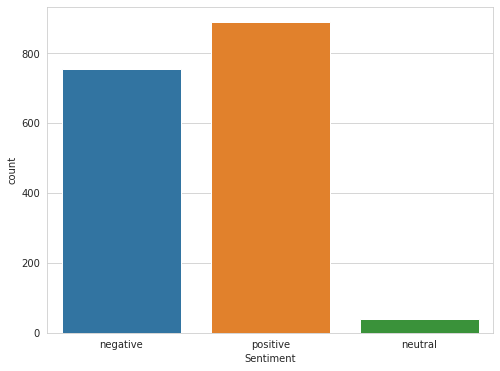

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score ,classification_report ,confusion_matrix , auc,roc_curve,roc_auc_score,plot_confusion_matrix
import sklearn.metrics as metrics
import numpy as np
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment", data=df)

In [71]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.8991097922848664


In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(X_train, y_train)

predicted= model.predict(X_test)
print("KNN Accuracy:",metrics.accuracy_score(y_test, predicted))

KNN Accuracy: 0.8130563798219584


In [94]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=80)
clf.fit(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier
#At last, we need to make prediction. It can be done with the help of following script −
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[146   0   5]
 [  4   0   2]
 [ 26   0 154]]
Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.97      0.89       151
     neutral       0.00      0.00      0.00         6
    positive       0.96      0.86      0.90       180

    accuracy                           0.89       337
   macro avg       0.60      0.61      0.60       337
weighted avg       0.88      0.89      0.88       337

Accuracy: 0.8902077151335311


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
#At last, we need to make prediction. It can be done with the help of following script −
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_1 = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_1)
print("Accuracy:",result2)

#from sklearn import metrics
#print(metrics.classification_report(y_test, y_pred_1))

Confusion Matrix:
[[137   1  13]
 [  5   1   0]
 [ 27   0 153]]
Classification Report:
              precision    recall  f1-score   support

    negative       0.81      0.91      0.86       151
     neutral       0.50      0.17      0.25         6
    positive       0.92      0.85      0.88       180

    accuracy                           0.86       337
   macro avg       0.74      0.64      0.66       337
weighted avg       0.86      0.86      0.86       337

Accuracy: 0.8635014836795252


In [96]:
from sklearn import svm
from sklearn import metrics
clf = svm.SVC()
clf.fit(X_train, y_train)
predicted= clf.predict(X_test)
print("svm Accuracy:",metrics.accuracy_score(y_test, predicted))

svm Accuracy: 0.9050445103857567


In [97]:
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score
kappa_val = cohen_kappa_score(y_test, predicted, weights='quadratic')
print('%.2f' % kappa_val)

0.83


In [101]:
from sklearn.linear_model import SGDClassifier
SGDClassifier(max_iter=5)
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8961424332344213


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [102]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

    negative       0.87      0.95      0.91       151
     neutral       0.00      0.00      0.00         6
    positive       0.94      0.90      0.92       180

    accuracy                           0.91       337
   macro avg       0.60      0.62      0.61       337
weighted avg       0.89      0.91      0.90       337



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
import numpy as np
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(random_state=0)
clf1.fit(X_train, y_train)
predict= clf1.predict(X_test)
#-------------------------------------------------------------
print("Accuracy: ", metrics.accuracy_score(y_test,predict))
print('\n classification report: \n')
print(classification_report(y_test,predict))
#-------------------------------------------------------------


Accuracy:  0.9050445103857567

 classification report: 

              precision    recall  f1-score   support

    negative       0.88      0.93      0.91       151
     neutral       0.00      0.00      0.00         6
    positive       0.93      0.91      0.92       180

    accuracy                           0.91       337
   macro avg       0.60      0.61      0.61       337
weighted avg       0.89      0.91      0.90       337



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
